In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('puppy-project-04')
jovian.set_colab_id('13h6C1WuPlWAvOfkgmLU5eZXK1qgak5j0')

# ⇨ Part Four: XGBOOST

In [ ]:
%%capture
!pip install numpy

In [ ]:
%%capture
!pip install pandas

In [ ]:
%%capture
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from zipfile import ZipFile
from urllib.request import urlretrieve
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import random as rd

In [ ]:
files = ("http://www.evanmarie.com/content/files/dataframes/merged_data.zip")
urlretrieve(files, 'merged_data.zip')
with ZipFile('merged_data.zip') as zipped_data:
  zipped_data.extractall(path='merged_data')

## 🧹 A little more housekeeping 

In [ ]:
orig_df_avg = pd.read_csv('merged_data/df_avgs.csv')
orig_df_zeros = pd.read_csv('merged_data/df_zeros.csv')

In [ ]:
# Create categorical columns for moon and wkdy
orig_df_avg = pd.get_dummies(orig_df_avg, columns=['moon', 'wkdy'])
orig_df_zeros = pd.get_dummies(orig_df_zeros, columns=['moon', 'wkdy'])

In [ ]:
keeper_cols = ['yr', 'mo', 'dy_cat', 'hr_bpm', 'o2_sat', 'o2_sat_kpa', 
               'moon_First Quarter', 'moon_Full Moon', 'moon_Last Quarter',
               'moon_New Moon', 'moon_Waning Crescent', 'moon_Waning Gibbous',
               'moon_Waxing Crescent', 'moon_Waxing Gibbous', 'wkdy_Friday',
               'wkdy_Monday', 'wkdy_Saturday', 'wkdy_Sunday', 'wkdy_Thursday',
               'wkdy_Tuesday', 'wkdy_Wednesday']

In [ ]:
orig_df_avg['targets'] = orig_df_avg['ex_min'] * orig_df_avg['act_cal'] * orig_df_avg['wlk_mph']

In [ ]:
xgboost_df = orig_df_avg.copy()
inputs = xgboost_df[keeper_cols]
targets = xgboost_df['targets']

## ⇨ XGBOOST TIME!

In [ ]:
xgboost_scaler = MinMaxScaler().fit(inputs)
inputs = xgboost_scaler.transform(inputs)

In [ ]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [ ]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42).fit(train_inputs, train_targets)

In [ ]:
preds = xgb_model.predict(train_inputs)

### TEST MODEL PARAMETERS:

In [ ]:
# My Plotting Color Lists

bright01 = ['DeepPink', 'Aqua', 'Blue', 'Crimson', 'DarkMagenta', 'Fuchsia']
wild = ['#970FF2', '#0597F2', '#49D907', '#EAF205', '#F24607']
pleasant = ['#F23847', '#8B41F2', '#049DD9', '#04BF7B', '#F2CB05']
distinguished = ['#0B2B40', '#30A5BF', '#185359', '#F2BE22', '#A6874E']
reds_blues = ['#A6033F', '#0540F2', '#056CF2', '#05AFF2', '#BF2604']
daring = ['#462666', '#A957CF', '#FFEF00', '#D1FF45', '#200066']
easter_eggs = ['#BF7DFA', '#7472D6', '#85B4EB', '#81D2D6', '#81F7BE']
nice_calm = ['#4C4A59', '#1B7F7A', '#0897B4', '#4CABA6', '#F2CDAC']
clowns = ['#BF0B3B', '#D50BD9', '#151EBF', '#29A632', '#F28B0C']
crayons = ['#F21B54', '#AA19FC', '#1E7FC6', '#03A64A', '#F2E205']
classy_bright = ['#5F49F2', '#5079F2', '#F2B807', '#F28907', '#F2220F']
tasteful_bright = ['#F194A7', '#18B3FC', '#09D309', '#F6CB09', '#F24606']
pretty_pastels = ['#E4FFD3', '#77E8DC', '#8682FF', '#E882C2', '#FFD4B2']
eighties = ['#FF1B87', '#014DE8', '#0EFF16', '#E8A302', '#FF0169']
primarily = ['#E89609', '#FF1307', '#FFF300', '#0FE808', '#20ABFF']
calm_blues = ['#D2A2F2', '#C1B3F2', '#99C8F2', '#94E1F2', '#91F2F2']

color_groups = [bright01, wild, pleasant, distinguished, reds_blues, daring,
                easter_eggs, nice_calm, clowns, crayons, classy_bright,
               tasteful_bright, pretty_pastels, eighties, primarily, calm_blues]

individual_colors = ['DeepPink', 'Aqua', 'Blue', 'Crimson', 'DarkMagenta', 'Fuchsia',
                     '#970FF2', '#0597F2', '#49D907', '#EAF205', '#F24607', '#F23847',
                     '#8B41F2', '#049DD9', '#04BF7B', '#F2CB05', '#0B2B40', '#30A5BF',
                     '#185359', '#F2BE22', '#A6874E', '#0B2B40', '#30A5BF', '#185359',
                     '#F2BE22', '#A6874E', '#A6033F', '#0540F2', '#056CF2', '#05AFF2',
                     '#BF2604', '#462666', '#A957CF', '#FFEF00', '#D1FF45', '#200066',
                     '#BF7DFA', '#7472D6', '#85B4EB', '#81D2D6', '#81F7BE', '#4C4A59',
                     '#1B7F7A', '#0897B4', '#4CABA6', '#F2CDAC', '#BF0B3B', '#D50BD9',
                     '#151EBF', '#29A632', '#F28B0C', '#F21B54', '#AA19FC', '#1E7FC6',
                     '#03A64A', '#F2E205']

blueish = ['#00FFFF', '#0000FF', '#00FFFF', '#00CED1', '#00BFFF', '#0000CD', '#48D1CC', '#C71585', '#AFEEEE',
                    '#B0E0E6', '#4169E1', '#87CEEB']
reddish = ['#FF00FF', '#FF69B4', '#FF00FF', '#FF4500', '#FF0000']
greenish = ['#7FFFD4', '#7FFF00', '#ADFF2F', '#00FF00', '#32CD32', '#3CB371', '#00FA9A', '#98FB98', '#00FF7F',
                    '#FFA500', '#FFFF00']
other = ['#9932CC', '#9400D3', '#FF1493', '#BA55D3', '     #9370D8', '#7B68EE', '#DDA0DD', '#EE82EE']
facecolors = ['#101010', '#202020 ', '#2f2f2f', '#3f3f3f', '#4f4f4f', '#5f5f5f', '#6f6f6f']


In [ ]:
def test_parameters(**params):
    model = XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(test_inputs), test_targets)
    return train_rmse, val_rmse

In [ ]:
def compare_number_estimators_rmse(iterations, estimator_increment):

  comparison_num_estimators = []
  estimator_count = 10
  train_rmse = 0
  val_rmse = 0

  for iteration in range(iterations):
      train_rmse, val_rmse = test_parameters(n_estimators = estimator_count)
      comparison_num_estimators.append([iteration, estimator_count, train_rmse, val_rmse])
      print(f"XGBoost on iteration number {iteration + 1} of {iterations} with {estimator_count} estimators")
      print(f"received a combined training RMSE of {train_rmse: .2f}")
      print(f"and a combined validation RMSE of {val_rmse: .2f}. \n")
      estimator_count += estimator_increment

  comparison_num_estimators = pd.DataFrame(comparison_num_estimators, columns = ['iteration', 'num_estimators', "training_rmse", "validation_rmse"])
  return(comparison_num_estimators)

### `n_estimators` ⇨ RMSE comparison training vs validation

In [ ]:
num_estimator_rmse = compare_number_estimators_rmse(25, 20)

XGBoost on iteration number 1 of 25 with 10 estimators
received a combined training RMSE of  1125.88
and a combined validation RMSE of  1248.26. 

XGBoost on iteration number 2 of 25 with 30 estimators
received a combined training RMSE of  633.32
and a combined validation RMSE of  890.65. 

XGBoost on iteration number 3 of 25 with 50 estimators
received a combined training RMSE of  424.58
and a combined validation RMSE of  771.40. 

XGBoost on iteration number 4 of 25 with 70 estimators
received a combined training RMSE of  305.71
and a combined validation RMSE of  708.85. 

XGBoost on iteration number 5 of 25 with 90 estimators
received a combined training RMSE of  235.48
and a combined validation RMSE of  668.00. 

XGBoost on iteration number 6 of 25 with 110 estimators
received a combined training RMSE of  182.98
and a combined validation RMSE of  649.11. 

XGBoost on iteration number 7 of 25 with 130 estimators
received a combined training RMSE of  142.63
and a combined validation 

### PLOT ONE PARAMETER FOR RMSE COMPARISON

`plot_one_param_rmse(dataframe, key_param = None, plot_title=None, 
                   x_label=None, y_label=None, plot_y_lim = None,
                   train_color = None, val_color = None, 
                   logscale_x = False)`

In [ ]:
def plot_one_param_rmse(dataframe, key_param = None, plot_title=None, 
                   x_label=None, y_label=None, plot_y_lim = None,
                   train_color = None, val_color = None, 
                   logscale_x = False):
  
  dataframe_to_training = dict(zip(dataframe[key_param], dataframe.training_rmse))
  dataframe_to_validation = dict(zip(dataframe[key_param], dataframe.validation_rmse))

  plt.figure(figsize=(10, 8), facecolor='#444444')
  ax = plt.axes()
  ax.set_facecolor("#222222")

  if logscale_x: 
    plt.plot(np.log10(list(dataframe_to_training.keys())), list(dataframe_to_training.values()), label='Training', marker='s', c=train_color, linewidth=3, markersize=8)
    plt.plot(np.log10(list(dataframe_to_validation.keys())), list(dataframe_to_validation.values()), label='Validation', marker='o', c=val_color, linewidth=3, markersize=8)
  
  else:
    plt.plot(list(dataframe_to_training.keys()), list(dataframe_to_training.values()), label='Training', marker='s', c=train_color, linewidth=3, markersize=10)
    plt.plot(list(dataframe_to_validation.keys()), list(dataframe_to_validation.values()), label='Validation', marker='o', c=val_color, linewidth=3, markersize=10)
  
  ax.minorticks_on()
  ax.grid(color='white', linestyle='--', linewidth=0.7)
  ax.tick_params(axis='x', colors='white') 
  ax.tick_params(axis='y', colors='white') 
  plt.ylim(plot_y_lim)
  plt.grid(which='minor', axis='both', alpha=0.5, color='white')
  plt.grid(which='major', axis='both', alpha=0.75, color='white')
  plt.rc('axes', titlesize=16)
  plt.xlabel(x_label, color='white', size=15)
  plt.ylabel(y_label, color='white', size=15)
  plt.title(plot_title, color="white", size = 20, y=1.05)
  ax.legend(shadow=True, fancybox=True, loc = 'upper right', fontsize=14)

  plt.show()

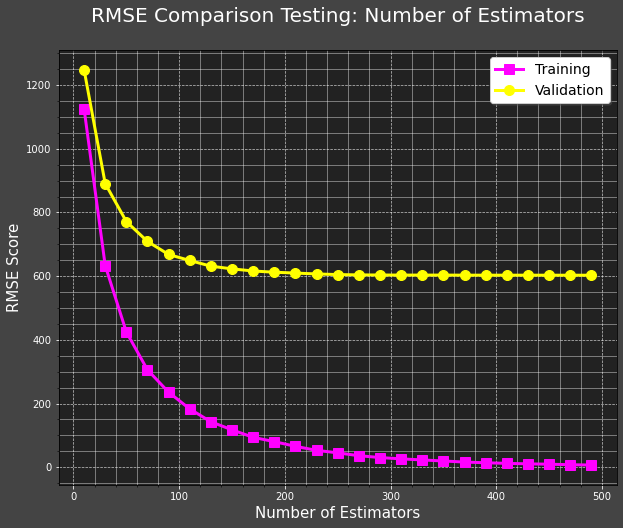

In [ ]:
plot_one_param_rmse(num_estimator_rmse, key_param = 'num_estimators', plot_title="RMSE Comparison Testing: Number of Estimators", 
                   x_label="Number of Estimators", y_label='RMSE Score',
                   train_color = rd.choice(reddish), val_color = rd.choice(greenish), 
                   logscale_x = False)

### `n_estimators` ⇨ Accuracy comparison training vs validation (max_depth is 44)

In [ ]:
def num_estimators_accuracy(iterations, X_train, train_targets, X_val, val_targets, estimator_start, estimator_increment):
 
  comparison_num_estimators = []
  estimator_count = estimator_start
  training_accuracy = 0
  validation_accuracy = 0
 
  for iteration in range(iterations):
      model = XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42, n_estimators=estimator_count, max_depth = 44)
      model.fit(X_train, train_targets)
      comparison_num_estimators.append([iteration, estimator_count, model.score(X_train, train_targets), model.score(X_val, val_targets)])
      print("XGBoost Regressor Model with max depth of 44:")
      print(f"Iteration number {iteration + 1} of {iterations} with {estimator_count} decision trees ")
      print(f"received a training score of {(model.score(X_train, train_targets)*100): .2f}% and a validation score of {(model.score(X_val, val_targets)*100): .2f}%. \n")
      estimator_count += estimator_increment
  comparison_num_estimators = pd.DataFrame(comparison_num_estimators, columns = ['iteration', 'num_estimators', "training", "validation"])
 
  return(comparison_num_estimators)

In [ ]:
num_estimator_accuracy = num_estimators_accuracy(25, train_inputs, train_targets, test_inputs, test_targets, 5, 20)

XGBoost Regressor Model with max depth of 44:
Iteration number 1 of 25 with 5 decision trees 
received a training score of  90.75% and a validation score of  82.21%. 

XGBoost Regressor Model with max depth of 44:
Iteration number 2 of 25 with 25 decision trees 
received a training score of  100.00% and a validation score of  89.54%. 

XGBoost Regressor Model with max depth of 44:
Iteration number 3 of 25 with 45 decision trees 
received a training score of  100.00% and a validation score of  89.53%. 

XGBoost Regressor Model with max depth of 44:
Iteration number 4 of 25 with 65 decision trees 
received a training score of  100.00% and a validation score of  89.53%. 

XGBoost Regressor Model with max depth of 44:
Iteration number 5 of 25 with 85 decision trees 
received a training score of  100.00% and a validation score of  89.53%. 

XGBoost Regressor Model with max depth of 44:
Iteration number 6 of 25 with 105 decision trees 
received a training score of  100.00% and a validation s

### PLOT ONE PARAMETER FOR ACCURACY COMPARISON

`plot_one_param_accuracy(dataframe, key_param = None, plot_title=None,
                  x_label=None, y_label=None, plot_y_lim = None,
                  train_color = None, val_color = None,
                  logscale_x = False)`

In [ ]:
def plot_one_param_accuracy(dataframe, key_param = None, plot_title=None,
                  x_label=None, y_label=None, plot_y_lim = None,
                  train_color = None, val_color = None,
                  logscale_x = False):
    dataframe_to_training = dict(zip(dataframe[key_param], dataframe.training))
    dataframe_to_validation = dict(zip(dataframe[key_param], dataframe.validation))
 
    plt.figure(figsize=(10, 8), facecolor='#444444')
    ax = plt.axes()
    ax.set_facecolor("#222222")
 
    if logscale_x:
        plt.plot(np.log10(list(dataframe_to_training.keys())), list(dataframe_to_training.values()), label='Training', marker='s', c=train_color, linewidth=3, markersize=10)
        plt.plot(np.log10(list(dataframe_to_validation.keys())), list(dataframe_to_validation.values()), label='Validation', marker='o', c=val_color, linewidth=3, markersize=10)
    else:
        plt.plot(list(dataframe_to_training.keys()), list(dataframe_to_training.values()), label='Training', marker='s', c=train_color, linewidth=3, markersize=10)
        plt.plot(list(dataframe_to_validation.keys()), list(dataframe_to_validation.values()), label='Validation', marker='o', c=val_color, linewidth=3, markersize=10)

        ax.grid(color='white', linestyle='--', linewidth=0.7)
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        plt.ylim(plot_y_lim)
        plt.rc('axes', titlesize=16)
        plt.xlabel(x_label, color='white', size=15)
        plt.ylabel(y_label, color='white', size=15)
        plt.title(plot_title, color="white", size = 20, y=1.05)
        ax.legend(shadow=True, fancybox=True, loc = 'upper right', fontsize=14)

    plt.show()

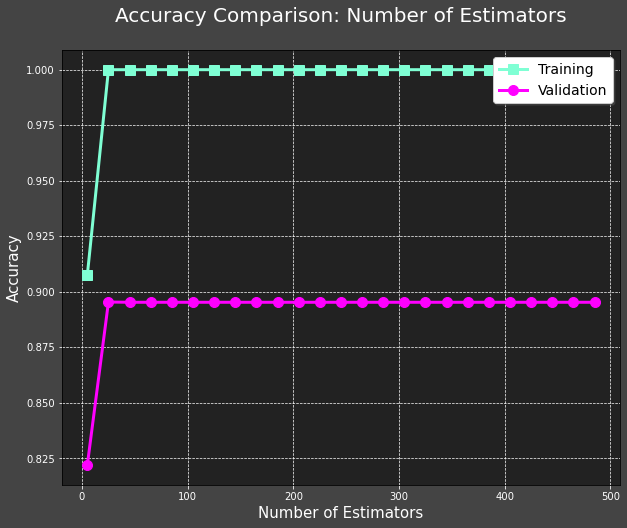

In [ ]:
plot_one_param_accuracy(num_estimator_accuracy, key_param = "num_estimators", plot_title="Accuracy Comparison: Number of Estimators",
                  x_label="Number of Estimators", y_label="Accuracy", plot_y_lim = None,
                  train_color = rd.choice(greenish), val_color = rd.choice(reddish),
                  logscale_x = False)

### `max_depth` ⇨ RMSE comparison training vs validation (n_estimators is 200, based on its testing above.)

In [ ]:
def compare_max_depth_rmse(iterations, start_depth, max_depth_increment):

  comparison_max_depth = []
  max_depth = start_depth
  train_rmse = 0
  val_rmse = 0

  for iteration in range(iterations):
      train_rmse, val_rmse = test_parameters(max_depth = max_depth, n_estimators = 200)
      comparison_max_depth.append([iteration, max_depth, train_rmse, val_rmse])
      print(f"XGBoost on iteration number {iteration + 1} of {iterations} with max depth of {max_depth}")
      print(f"received a training RMSE of {train_rmse: .2f} and a validation RMSE of {val_rmse: .2f}. \n")
    
      max_depth += max_depth_increment

  comparison_max_depth = pd.DataFrame(comparison_max_depth, columns = ['iteration', 'max_depth', "training_rmse", "validation_rmse"])
  return(comparison_max_depth)

In [ ]:
max_depth_rmse = compare_max_depth_rmse(15, 1, 5)

XGBoost on iteration number 1 of 15 with max depth of 1
received a training RMSE of  1821.83 and a validation RMSE of  1727.99. 

XGBoost on iteration number 2 of 15 with max depth of 6
received a training RMSE of  72.10 and a validation RMSE of  611.10. 

XGBoost on iteration number 3 of 15 with max depth of 11
received a training RMSE of  0.01 and a validation RMSE of  694.58. 

XGBoost on iteration number 4 of 15 with max depth of 16
received a training RMSE of  0.00 and a validation RMSE of  663.29. 

XGBoost on iteration number 5 of 15 with max depth of 21
received a training RMSE of  0.00 and a validation RMSE of  709.25. 

XGBoost on iteration number 6 of 15 with max depth of 26
received a training RMSE of  0.00 and a validation RMSE of  707.96. 

XGBoost on iteration number 7 of 15 with max depth of 31
received a training RMSE of  0.00 and a validation RMSE of  708.16. 

XGBoost on iteration number 8 of 15 with max depth of 36
received a training RMSE of  0.00 and a validation 

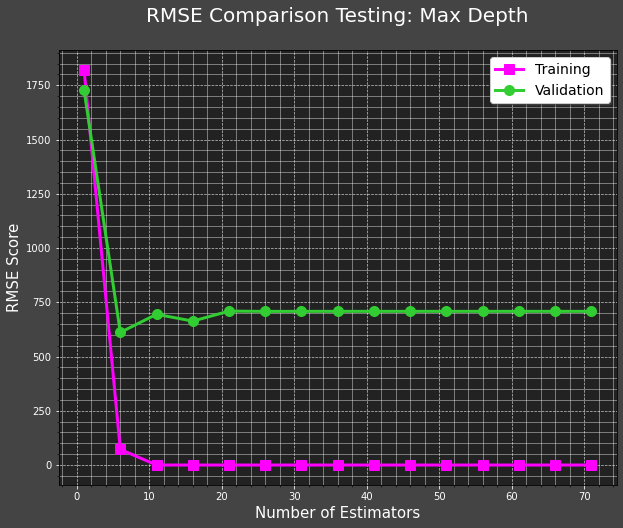

In [ ]:
plot_one_param_rmse(max_depth_rmse, key_param = 'max_depth', plot_title="RMSE Comparison Testing: Max Depth", 
                   x_label="Number of Estimators", y_label='RMSE Score',
                   train_color = rd.choice(reddish), val_color = rd.choice(greenish), 
                   logscale_x = False)

### `max_depth` ⇨ Accuracy comparison training vs validation (n_estimators is 200, based on its testing above.)

In [ ]:
def max_depth_accuracy(iterations, X_train, train_targets, X_val, val_targets, max_depth_start, max_depth_increment):
 
  comparison_max_depth = []
  max_depth = max_depth_start
  training_accuracy = 0
  validation_accuracy = 0
 
  for iteration in range(iterations):
      model = XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42, n_estimators=200, max_depth = max_depth)
      model.fit(X_train, train_targets)
      comparison_max_depth.append([iteration, max_depth, model.score(X_train, train_targets), model.score(X_val, val_targets)])
      print("XGBoost Regressor Model with 200 decision trees:")
      print(f"Iteration number {iteration + 1} of {iterations} with max_depth of {max_depth}: ")
      print(f"received a training score of {(model.score(X_train, train_targets)*100): .2f}% and a validation score of {(model.score(X_val, val_targets)*100): .2f}%. \n")
      max_depth += max_depth_increment
  comparison_max_depth = pd.DataFrame(comparison_max_depth, columns = ['iteration', 'max_depth', "training", "validation"])
 
  return(comparison_max_depth)

In [ ]:
max_depth_accuracy = max_depth_accuracy(15, train_inputs, train_targets, test_inputs, test_targets, 1, 3)

XGBoost Regressor Model with 200 decision trees:
Iteration number 1 of 15 with max_depth of 1: 
received a training score of  49.54% and a validation score of  37.67%. 

XGBoost Regressor Model with 200 decision trees:
Iteration number 2 of 15 with max_depth of 4: 
received a training score of  98.18% and a validation score of  87.38%. 

XGBoost Regressor Model with 200 decision trees:
Iteration number 3 of 15 with max_depth of 7: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost Regressor Model with 200 decision trees:
Iteration number 4 of 15 with max_depth of 10: 
received a training score of  100.00% and a validation score of  95.15%. 

XGBoost Regressor Model with 200 decision trees:
Iteration number 5 of 15 with max_depth of 13: 
received a training score of  100.00% and a validation score of  89.81%. 

XGBoost Regressor Model with 200 decision trees:
Iteration number 6 of 15 with max_depth of 16: 
received a training score of  100.00% and a valid

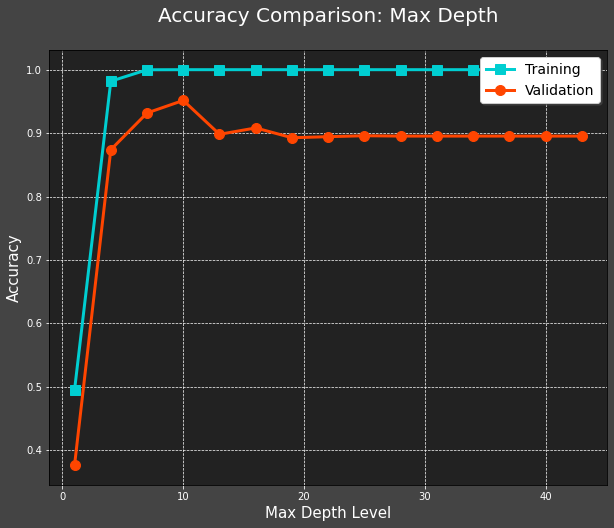

In [ ]:
plot_one_param_accuracy(max_depth_accuracy, key_param = "max_depth", plot_title="Accuracy Comparison: Max Depth",
                  x_label="Max Depth Level", y_label="Accuracy", plot_y_lim = None,
                  train_color = rd.choice(blueish), val_color = rd.choice(reddish),
                  logscale_x = False)

### `learning_rate` ⇨ RMSE comparison training vs validation (n_estimators is 200, and max_depth is 7,  based on the testing above.)

In [ ]:
def compare_learning_rate_rmse(iterations, learning_rate_start, learning_rate_increment):

  comparison_learning_rate = []
  learning_rate = learning_rate_start
  train_rmse = 0
  val_rmse = 0

  for iteration in range(iterations):
      train_rmse, val_rmse = test_parameters(learning_rate = learning_rate, n_estimators = 200, max_depth=7)
      comparison_learning_rate.append([iteration, learning_rate, train_rmse, val_rmse])
      print(f"XGBoost on iteration number {iteration + 1} of {iterations} with learning rate of {learning_rate}")
      print(f"received a training RMSE of {train_rmse: .2f} and a validation RMSE of {val_rmse: .2f}. \n")
      learning_rate += learning_rate_increment

  comparison_learning_rate = pd.DataFrame(comparison_learning_rate, columns = ['iteration', 'learning_rate', "training_rmse", "validation_rmse"])
  return(comparison_learning_rate)

In [ ]:
learning_rate_rmse = compare_learning_rate_rmse(iterations = 11, learning_rate_start = 0.0, learning_rate_increment = 0.1)


XGBoost on iteration number 1 of 11 with learning rate of 0.0
received a training RMSE of  2927.22 and a validation RMSE of  2600.15. 

XGBoost on iteration number 2 of 11 with learning rate of 0.1
received a training RMSE of  227.03 and a validation RMSE of  650.09. 

XGBoost on iteration number 3 of 11 with learning rate of 0.2
received a training RMSE of  66.46 and a validation RMSE of  538.30. 

XGBoost on iteration number 4 of 11 with learning rate of 0.30000000000000004
received a training RMSE of  28.49 and a validation RMSE of  571.92. 

XGBoost on iteration number 5 of 11 with learning rate of 0.4
received a training RMSE of  10.45 and a validation RMSE of  528.71. 

XGBoost on iteration number 6 of 11 with learning rate of 0.5
received a training RMSE of  3.59 and a validation RMSE of  535.28. 

XGBoost on iteration number 7 of 11 with learning rate of 0.6
received a training RMSE of  1.16 and a validation RMSE of  595.16. 

XGBoost on iteration number 8 of 11 with learning r

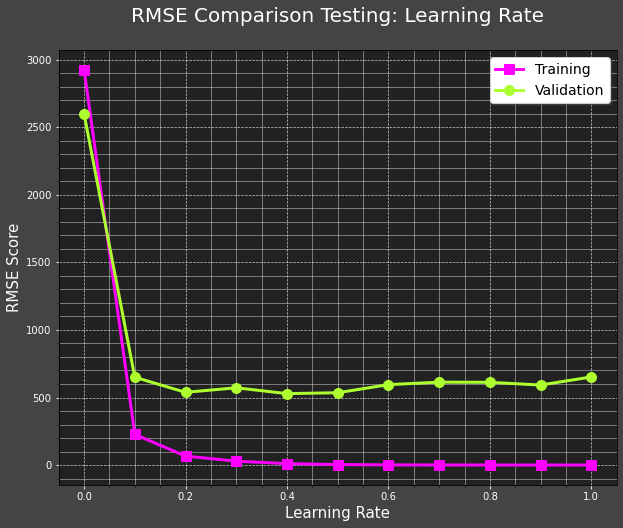

In [ ]:
plot_one_param_rmse(learning_rate_rmse, key_param = 'learning_rate', plot_title="RMSE Comparison Testing: Learning Rate", 
                   x_label="Learning Rate", y_label='RMSE Score',
                   train_color = rd.choice(reddish), val_color = rd.choice(greenish), 
                   logscale_x = False)

### `learning_rate` ⇨ Accuracy comparison training vs validation (n_estimators is 200, and max_depth is 7,  based on the testing above.)

In [ ]:
def learning_rate_accuracy(iterations, X_train, train_targets, X_val, val_targets, learning_rate_start, learning_rate_increment):
 
  comparison_learning_rate = []
  learning_rate = learning_rate_start
  training_accuracy = 0
  validation_accuracy = 0
 
  for iteration in range(iterations):
      model = XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42, n_estimators=200, max_depth = 7)
      model.fit(X_train, train_targets)
      comparison_learning_rate.append([iteration, learning_rate, model.score(X_train, train_targets), model.score(X_val, val_targets)])
      print("XGBoost Regressor Model with 200 decision trees and max depth of 7:")
      print(f"Iteration number {iteration + 1} of {iterations} with learning rate of {learning_rate}: ")
      print(f"received a training score of {(model.score(X_train, train_targets)*100): .2f}% and a validation score of {(model.score(X_val, val_targets)*100): .2f}%. \n")
      learning_rate += learning_rate_increment
  comparison_learning_rate = pd.DataFrame(comparison_learning_rate, columns = ['iteration', 'learning_rate', "training", "validation"])
 
  return(comparison_learning_rate)

In [ ]:
learning_rate_accuracy = learning_rate_accuracy(11, train_inputs, train_targets, test_inputs, test_targets, 0.0, 0.1)


XGBoost Regressor Model with 200 decision trees and max depth of 7:
Iteration number 1 of 11 with learning rate of 0.0: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost Regressor Model with 200 decision trees and max depth of 7:
Iteration number 2 of 11 with learning rate of 0.1: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost Regressor Model with 200 decision trees and max depth of 7:
Iteration number 3 of 11 with learning rate of 0.2: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost Regressor Model with 200 decision trees and max depth of 7:
Iteration number 4 of 11 with learning rate of 0.30000000000000004: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost Regressor Model with 200 decision trees and max depth of 7:
Iteration number 5 of 11 with learning rate of 0.4: 
received a training score of  99.99% and a validation score of  93.17%. 

XGBoost R

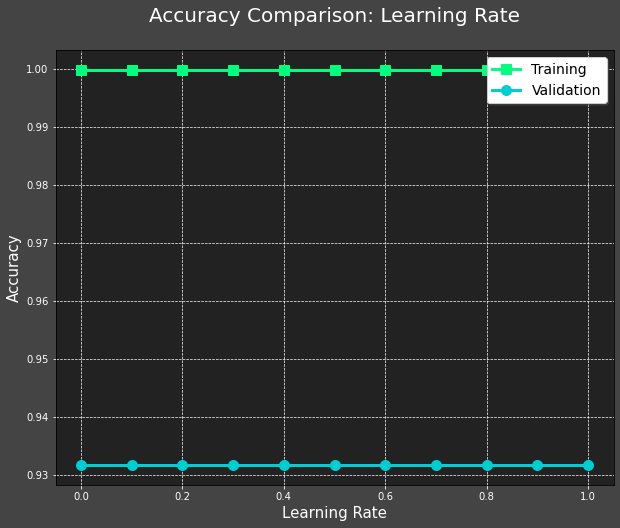

In [ ]:
plot_one_param_accuracy(learning_rate_accuracy, key_param = "learning_rate", plot_title="Accuracy Comparison: Learning Rate",
                  x_label="Learning Rate", y_label="Accuracy", plot_y_lim = None,
                  train_color = rd.choice(greenish), val_color = rd.choice(blueish),
                  logscale_x = False)

### `subsample` ⇨ RMSE comparison training vs validation (n_estimators is 200, max_depth is 7,  and learning rate is 0.1 based on the testing above.)

In [ ]:
def compare_subsample_rmse(iterations, subsample_start, subsample_increment):

  comparison_subsample = []
  subsample_count = subsample_start
  train_rmse = 0
  val_rmse = 0

  for iteration in range(iterations):
      train_rmse, val_rmse = test_parameters(subsample = subsample_count, n_estimators = 200, max_depth = 7, learning_rate = 0.1)
      comparison_subsample.append([iteration, subsample_count, train_rmse, val_rmse])
      print(f"XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration {iteration + 1} of {iterations} with subsample of {subsample_count}")
      print(f"received a training RMSE of {train_rmse: .2f} and a validation RMSE of {val_rmse: .2f}. \n")
      subsample_count += subsample_increment

  comparison_subsample = pd.DataFrame(comparison_subsample, columns = ['iteration', 'subsample_count', "training_rmse", "validation_rmse"])
  return(comparison_subsample)

In [ ]:
subsample_rmse = compare_subsample_rmse(iterations=10, subsample_start=0, subsample_increment=0.1)

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 1 of 10 with subsample of 0
received a training RMSE of  2927.22 and a validation RMSE of  2600.15. 

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 2 of 10 with subsample of 0.1
received a training RMSE of  727.08 and a validation RMSE of  1103.44. 

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 3 of 10 with subsample of 0.2
received a training RMSE of  388.64 and a validation RMSE of  701.99. 

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 4 of 10 with subsample of 0.30000000000000004
received a training RMSE of  307.64 and a validation RMSE of  638.35. 

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 5 of 10 with subsample of 0.4
received a training RMSE of  223.73 and a validation RMSE of  587.20. 

XGBoost(n_estimators=200, max_depth=7, learning_rate=0.1) on iteration 6 of 10 with subsample of 0.5
received a traini

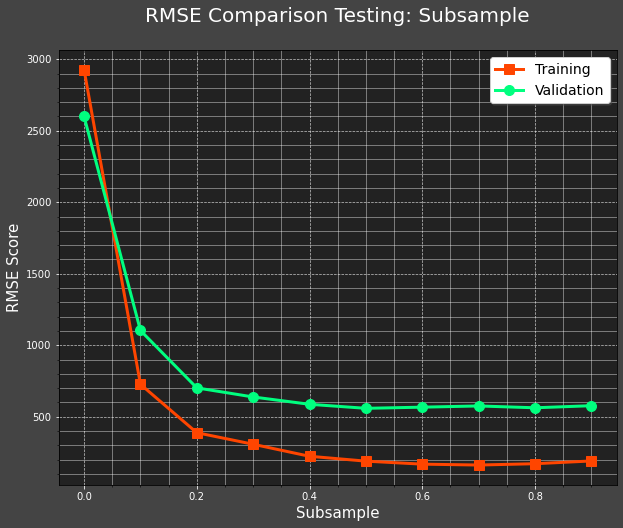

In [ ]:
plot_one_param_rmse(subsample_rmse, key_param = 'subsample_count', plot_title="RMSE Comparison Testing: Subsample", 
                   x_label="Subsample", y_label='RMSE Score',
                   train_color = rd.choice(reddish), val_color = rd.choice(greenish), 
                   logscale_x = False)

### `subsample` ⇨ Accuracy comparison training vs validation (n_estimators is 200, max_depth is 7,  and learning rate is 0.1 based on the testing above.)

In [ ]:
def subsample_accuracy(iterations, X_train, train_targets, X_val, val_targets, subsample_start, subsample_increment):
 
  comparison_subsample = []
  subsample = subsample_start
  training_accuracy = 0
  validation_accuracy = 0
 
  for iteration in range(iterations):
      model = XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42, n_estimators=200, max_depth=7, learning_rate=0.1, subsample=subsample)
      model.fit(X_train, train_targets)
      comparison_subsample.append([iteration, subsample, model.score(X_train, train_targets), model.score(X_val, val_targets)])
      print("XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): \n")
      print(f"Iteration number {iteration + 1} of {iterations} with subsample of {subsample}: ")
      print(f"received a training score of {(model.score(X_train, train_targets)*100): .2f}% and a validation score of {(model.score(X_val, val_targets)*100): .2f}%. \n")
      subsample += subsample_increment
  comparison_subsample = pd.DataFrame(comparison_subsample, columns = ['iteration', 'subsample', "training", "validation"])
 
  return(comparison_subsample)

In [ ]:
subsample_accuracy = subsample_accuracy(10, train_inputs, train_targets, test_inputs, test_targets, subsample_start=0, subsample_increment=0.1)


XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): 

Iteration number 1 of 10 with subsample of 0: 
received a training score of -30.27% and a validation score of -41.13%. 

XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): 

Iteration number 2 of 10 with subsample of 0.1: 
received a training score of  91.96% and a validation score of  74.58%. 

XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): 

Iteration number 3 of 10 with subsample of 0.2: 
received a training score of  97.70% and a validation score of  89.71%. 

XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): 

Iteration number 4 of 10 with subsample of 0.30000000000000004: 
received a training score of  98.56% and a validation score of  91.49%. 

XGBoostRegressor(n_estimators=200, max_depth=7, learning_rate=0.1): 

Iteration number 5 of 10 with subsample of 0.4: 
received a training score of  99.24% and a validation score of  92.80%. 

XGBoostRegressor(n_es

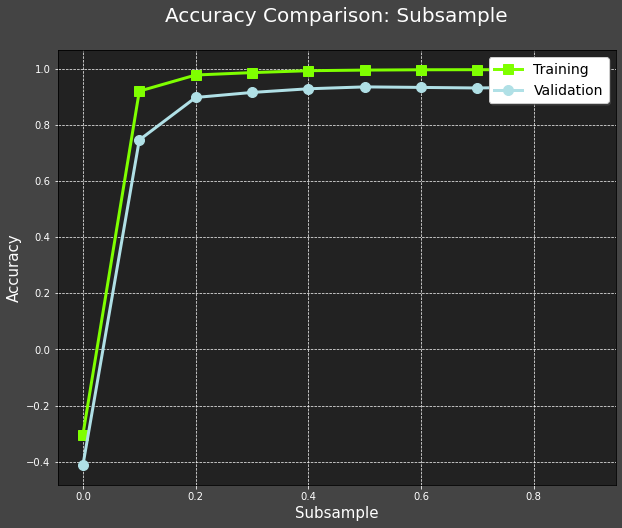

In [ ]:
plot_one_param_accuracy(subsample_accuracy, key_param = "subsample", plot_title="Accuracy Comparison: Subsample",
                  x_label="Subsample", y_label="Accuracy", plot_y_lim = None,
                  train_color = rd.choice(greenish), val_color = rd.choice(blueish),
                  logscale_x = False)

## MODEL PARAMETERS DECIDED: 
### `XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.5)`

In [ ]:
xgbmodel_optimized = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.5)

In [ ]:
xgbmodel_optimized.fit(train_inputs, train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
optimized_predictions = xgbmodel_optimized.predict(train_inputs)

In [ ]:
feature_importances_df = xgboost_df[keeper_cols]

importance_df = pd.DataFrame({
    'feature': feature_importances_df.columns,
    'importance': xgbmodel_optimized.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
3,hr_bpm,0.113305
14,wkdy_Friday,0.086774
6,moon_First Quarter,0.085905
15,wkdy_Monday,0.084472
11,moon_Waning Gibbous,0.064860
0,yr,0.061016
8,moon_Last Quarter,0.055773
19,wkdy_Tuesday,0.045100
13,moon_Waxing Gibbous,0.041568
5,o2_sat_kpa,0.041348


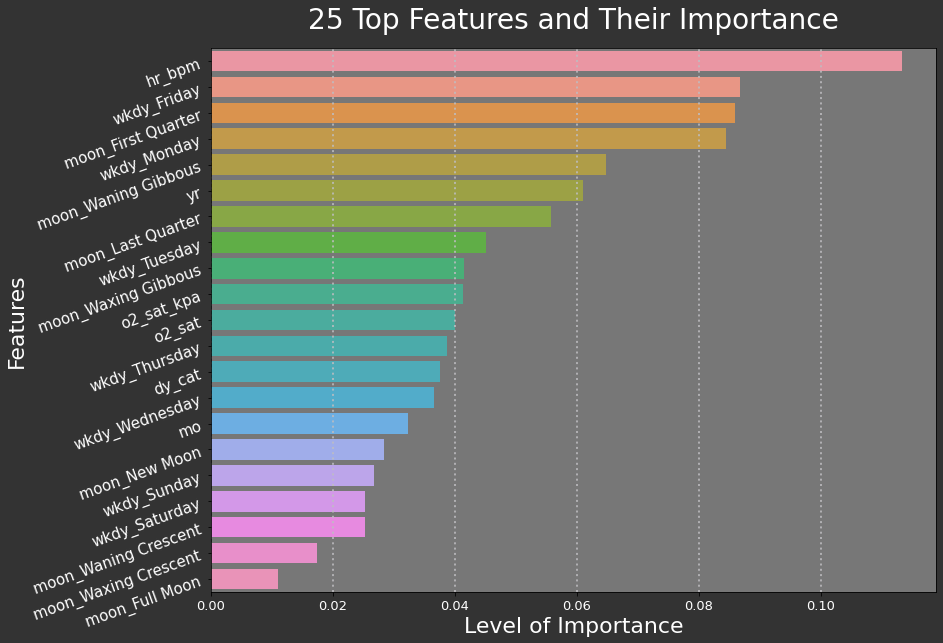

In [ ]:
# Features and Their Importances Plotted    
fig = plt.figure(figsize=(13, 10), facecolor='#333333')
ax = plt.axes(facecolor="#777777")
plt.xticks(fontsize=13, color="white")
plt.yticks(fontsize=13, color="white", rotation = 20, size=15)
plt.grid(axis='both', which='major', color='#bfbec2', linestyle=':', linewidth=2, alpha=.8)
plt.grid(axis="both", which='minor', color='#bfbec2', linestyle='-', alpha=0.4)
sns.barplot(data=importance_df.head(25), x='importance', y='feature', alpha=1)
sns.set_palette(rd.choice(color_groups))
ax.set_title("25 Top Features and Their Importance", fontsize=28, color="white", pad=20)
ax.set_xlabel("Level of Importance", fontsize=22, color="white")
ax.set_ylabel("Features", fontsize=22, color="white")
fig.show()
plt.show()

## Final optimized model's training and validation scores

In [ ]:
scores = xgbmodel_optimized.score(train_inputs, train_targets), xgbmodel_optimized.score(test_inputs, test_targets)


In [ ]:
print(f'Optimized model training accuracy score is {scores[0] * 100 :.2f}%, \nand validation score of {scores[1] * 100 :.2f}%. Not too shabby!')
      

Optimized model training accuracy score is 99.45%, 
and validation score of 93.48%. Not too shabby!
